In [39]:
import numpy as np
import os
import matplotlib.pyplot as plt
import mpl_lego as mplego
import pandas as pd

from hatespeech import keys, utils
from scipy.stats import bootstrap, mannwhitneyu

%matplotlib inline

In [2]:
mplego.style.use_latex_style()

In [3]:
data_path = "~/data/hatespeech/unfiltered_ratings.feather"
rater_quality_path = "~/data/hatespeech/rater_quality_check.csv"

In [4]:
data = pd.read_feather(data_path)

In [5]:
# Read in hate speech data
data = pd.read_feather(data_path)
# Remove all rows in which some item is missing
data = utils.filter_missing_items(data)
# Remove all rows in which the rater is not up to sufficient quality
rater_quality = pd.read_csv(rater_quality_path)
data = utils.filter_annotator_quality(data, rater_quality)
# Recode item responses
data = utils.recode_responses(
    data,
    insult={1: 0, 2: 1, 3: 2, 4: 3},
    humiliate={1: 0, 2: 0, 3: 1, 4: 2},
    status={1: 0, 2: 0, 3: 1, 4: 1},
    dehumanize={1: 0, 2: 0, 3: 1, 4: 1},
    violence={1: 0, 2: 0, 3: 1, 4: 1},
    genocide={1: 0, 2: 0, 3: 1, 4: 1},
    attack_defend={1: 0, 2: 1, 3: 2, 4: 3},
    hatespeech={1: 0, 2: 1})

In [6]:
# Extract reference set
reference_set = data[data['platform'] == 'reference'].copy()

In [8]:
print(f'Number of unique reference set comments: {reference_set["comment_id"].unique().size}')
print(f'Number of samples in reference set: {reference_set.shape[0]}')

Number of unique reference set comments: 70
Number of samples in reference set: 50211


In [10]:
reference_bw = utils.filter_annotator_identity(reference_set, ['annotator_race_black', 'annotator_race_white'])

In [11]:
targets = ['target_race_black', 'target_race_white']

In [12]:
agreed_comments, samples = utils.get_comments_w_agreement(reference_bw, targets, 0.5)

In [13]:
targeting_black = samples[samples['target_race_black_agreed']].copy()

In [14]:
targeting_black['annotator_race'] = np.where(targeting_black['annotator_race_black'], 'black', 'white')

In [15]:
diffs = targeting_black.groupby(['comment_id', 'annotator_race']).mean()[keys.items]

In [16]:
diffs

sentiment   respect    insult  humiliate    status  \
comment_id annotator_race                                                       
20001      black            3.987179  3.923077  2.820513   1.653846  0.820513   
           white            3.936441  3.959040  2.841808   1.481638  0.884181   
20002      black            4.000000  3.945946  2.864865   1.837838  1.000000   
           white            3.987603  3.969697  2.922865   1.727273  0.953168   
20003      black            3.965909  4.000000  2.840909   1.715909  0.863636   
...                              ...       ...       ...        ...       ...   
20055      white            2.536098  1.548387  0.436252   0.119816  0.376344   
20062      black            0.281690  0.112676  0.014085   0.000000  0.028169   
           white            0.214286  0.177778  0.022222   0.003175  0.004762   
20066      black            0.451220  0.304878  0.060976   0.036585  0.012195   
           white            0.545031  0.380435  0.069876   0.006211  0.017081   

                           dehumanize  violence  genocide  attack_defend  \
comment_id annotator_race                                                  
20001      black             0.769231  0.910256  0.923077       2.858974   
           white             0.750000  0.973164  0.963277       2.831921   
20002      black             0.905405  0.891892  0.851351       2.905405   
           white             0.932507  0.838843  0.803030       2.874656   
20003      black             0.761364  0.943182  0.772727       2.897727   
...                               ...       ...       ...            ...   
20055      white             0.052227  0.004608  0.000000       0.470046   
20062      black             0.000000  0.000000  0.000000       0.535211   
           white             0.004762  0.000000  0.000000       0.414286   
20066      black             0.000000  0.000000  0.000000       0.463415   
           white             0.003106  0.004658  0.004658       0.472050   

                           hatespeech  
comment_id annotator_race              
20001      black             0.987179  
           white             0.983051  
20002      black             1.000000  
           white             0.984848  
20003      black             1.000000  
...                               ...  
20055      white             0.009217  
20062      black             0.000000  
           white             0.004762  
20066      black             0.000000  
           white             0.007764  

[62 rows x 10 columns]

In [17]:
mean_diffs = diffs.diff().query("annotator_race == 'white'").droplevel('annotator_race')

In [18]:
mean_diffs

,sentiment,respect,insult,humiliate,status,dehumanize,violence,genocide,attack_defend,hatespeech
comment_id,,,,,,,,,,
20001,-0.050739,0.035963,0.021295,-0.172208,0.063668,-0.019231,0.062907,0.040200,-0.027053,-0.004129
20002,-0.012397,0.023751,0.058000,-0.110565,-0.046832,0.027101,-0.053049,-0.048321,-0.030750,-0.015152
20003,0.003192,-0.029494,-0.010853,-0.145684,0.024004,-0.022600,0.034346,-0.026941,-0.011491,-0.019663
20005,0.058902,0.113002,0.028714,0.054408,0.152350,0.009811,0.156878,-0.001372,0.244700,0.070086
20007,-0.042276,-0.043417,-0.086368,-0.043469,0.097728,0.029567,0.023913,-0.131912,-0.019815,0.003164
20008,0.047608,-0.014035,-0.111324,-0.120494,0.187081,0.024402,-0.006619,-0.050000,0.053907,0.001595
20009,-0.017265,-0.027244,-0.042709,-0.228890,0.065830,-0.071400,0.077256,0.084643,-0.011073,-0.006075
20010,-0.004086,-0.026558,-0.032814,-0.203013,0.016343,-0.048774,-0.066905,-0.108018,-0.065501,-0.004980
20012,-0.077660,-0.051773,-0.199707,-0.149897,0.063263,-0.055234,0.081674,-0.015932,-0.143920,-0.037572


In [19]:
mean_diffs.sum(axis=1)

comment_id
20001   -0.049326
20002   -0.208212
20003   -0.205184
20005    0.887479
20007   -0.212885
20008    0.012121
20009   -0.176926
20010   -0.544305
20012   -0.586759
20014    0.100467
20015   -0.520906
20017   -0.193543
20020   -0.324669
20022    0.099787
20023   -0.233454
20029   -0.313566
20030   -0.028099
20031   -0.391569
20032   -1.319041
20033    0.331502
20036   -0.090620
20037   -0.669788
20039    1.339153
20041    0.342597
20043   -0.679385
20045   -0.071129
20049   -0.857907
20050    1.321925
20055    0.200054
20062   -0.125799
20066    0.181601
dtype: float64

In [20]:
race_comment_id = 20032
comment = targeting_black[targeting_black['comment_id'] == race_comment_id]
print(comment.drop_duplicates('comment_id').raw_text.values)

['shut the fuck up you dumb black bitch']


In [21]:
black_ratings = comment[comment['annotator_race'] == 'black'][keys.items]
white_ratings = comment[comment['annotator_race'] == 'white'][keys.items]
mean_black_ratings = black_ratings.mean()
mean_white_ratings = white_ratings.mean()

In [22]:
for item in keys.items:
    print(item, mannwhitneyu(black_ratings[item], white_ratings[item], alternative='greater').pvalue)

sentiment 0.07573385770407798
respect 0.04715095299285973
insult 0.0077241060367390915
humiliate 0.02935231423883827
status 0.8177309208263289
dehumanize 0.01028831902362266
violence 0.450985027771951
genocide 0.6695445592472813
attack_defend 0.017997039784163373
hatespeech 0.0009095525102722038


In [53]:
gender_comment_id = 20044
comment = targeting_black[targeting_black['comment_id'] == race_comment_id]
print(comment.drop_duplicates('comment_id').raw_text.values)
black_ratings = comment[comment['annotator_race'] == 'black'][keys.items]
white_ratings = comment[comment['annotator_race'] == 'white'][keys.items]
mean_black_ratings = black_ratings.mean()
mean_white_ratings = white_ratings.mean()

NameError: name 'race_comment_id' is not defined

<BarContainer object of 5 artists>

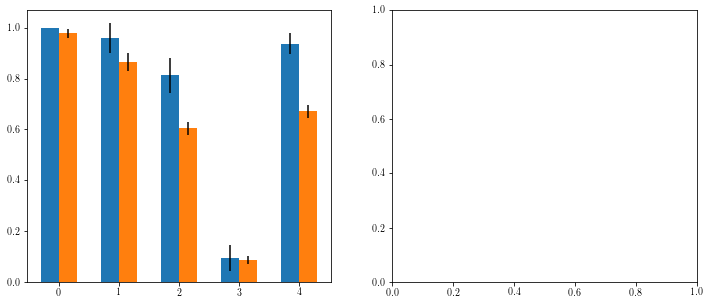

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_items = ['respect', 'insult', 'dehumanize', 'violence', 'hatespeech']
norms = [4, 3, 1, 1, 1]

black_errors = [bootstrap([black_ratings[item]], np.mean, method='basic').standard_error
                for item in plot_items]
white_errors = [bootstrap([white_ratings[item]], np.mean, method='basic').standard_error
                for item in plot_items]

width = 0.3
gap = 0.15
axes[0].bar(np.arange(5) - gap,
            mean_black_ratings[plot_items] / norms,
            width=width,
            yerr=black_errors,
            color='C0')

axes[0].bar(np.arange(5) + gap,
            mean_white_ratings[plot_items] / norms,
            width=width,
            yerr=white_errors,
            color='C1')


In [53]:
data[data['comment_id'] == 20070].drop_duplicates('comment_id')['raw_text'].values

array(['Who hurt you? Lol. It’s comical how stupid and angry you people are. \n\nMEH AMURICA. MY LAND. MINE. BANG BANG GUNS. NO BROWN PEOPLE. WAHH.'],
      dtype=object)

In [35]:
agreement = utils.get_annotator_agreement(reference_bw, ['target_race_black', 'target_race_white'])

In [49]:
agreement

,comment_id,target_race_black,target_race_white
0,20001,1.000000,0.000000
1,20002,0.998745,0.053952
2,20003,1.000000,0.032622
3,20004,1.000000,0.500000
4,20005,0.750000,0.250000
...,...,...,...
58,20066,1.000000,0.000000
59,20067,1.000000,0.750000
60,20068,0.230769,0.923077
61,20069,1.000000,1.000000


In [83]:
unique_white_20001 = df_20001[df_20001['race_label'] == 'white']['labeler_id'].nunique()
unique_black_20001 = df_20001[df_20001['race_label'] == 'black']['labeler_id'].nunique()

print('number of unique white labelers in comment 20001 is:', unique_white_20001)
print('number of unique black labelers in comment 20001 is:', unique_black_20001)

#the reason these don't add up to 799 is bc we are filtering out any non black / non white labelers 

number of unique white labelers in comment 20001 is: 595
number of unique black labelers in comment 20001 is: 72


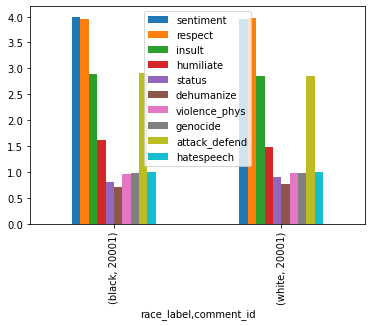

In [84]:
df_20001_race.plot.bar();

#one of the issues is that the the range that each item can take is not uniform 
#ie some items have been collapsed to binary, others are on a Likert scale (1-5)
#so how do we show that on here

In [90]:
df_20001_race.reset_index(level=['race_label', 'comment_id'], inplace=True)


In [103]:
df_20001_race.set_index('race_label', inplace=True)

In [106]:
df_20001_race

,comment_id,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,item
race_label,,,,,,,,,,,,
black,20001,4.000000,3.944444,2.888889,1.625000,0.805556,0.708333,0.958333,0.972222,2.916667,1.000000,
white,20001,3.956303,3.969748,2.857143,1.485714,0.899160,0.761345,0.976471,0.969748,2.853782,0.989916,


In [107]:
df_20001_race = df_20001_race.drop('item', 1)

In [110]:
df_20001_race = df_20001_race.drop('comment_id', 1)

In [111]:
df_20001_race.columns.values

array(['sentiment', 'respect', 'insult', 'humiliate', 'status',
       'dehumanize', 'violence_phys', 'genocide', 'attack_defend',
       'hatespeech'], dtype=object)

In [115]:
df_20001_race.T


race_label,black,white
sentiment,4.000000,3.956303
respect,3.944444,3.969748
insult,2.888889,2.857143
humiliate,1.625000,1.485714
status,0.805556,0.899160
dehumanize,0.708333,0.761345
violence_phys,0.958333,0.976471
genocide,0.972222,0.969748
attack_defend,2.916667,2.853782
hatespeech,1.000000,0.989916


In [114]:
#make the columns values (black, white) into columns
df_20001_race.T.columns

Index(['black', 'white'], dtype='object', name='race_label')

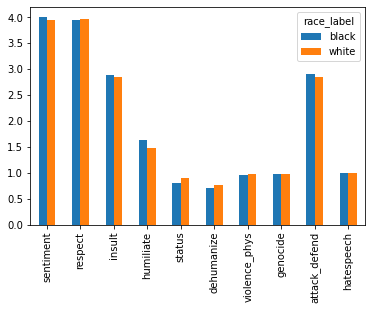

In [118]:
df_20001_race.T.plot.bar();

In [ ]:
#what's the comment_id that targets black folks and that has the most black labelers on it?
#this could help us decide which comments to see and also is interesting in and of itself
#for comments with greater than 50 labelers, what does the distribution of black labelers

In [124]:
#okay so here's a function that does everything we just did and puts into one 

def mean_item_by_race(df, comment_id_no):
    """ comment_id_no is the comment id number
    df is the dataframe"""
    
    items = ['sentiment', 'respect', 'insult', 'humiliate', 'status', 'dehumanize', 'violence_phys', 'genocide', 'attack_defend', 'hatespeech'] 
    
    df_comment = df[df['comment_id'] == comment_id_no]
    
    df_comment_race = df_comment[df_comment['race_label'].isin(['black', 'white'])].groupby(by=['race_label', 'comment_id']).mean()[items]
    
    df_comment_race.reset_index(level=['comment_id'], inplace=True)
    
    df_comment_race = df_comment_race.drop('comment_id', 1)
    
    return df_comment_race.T.plot.bar()

 

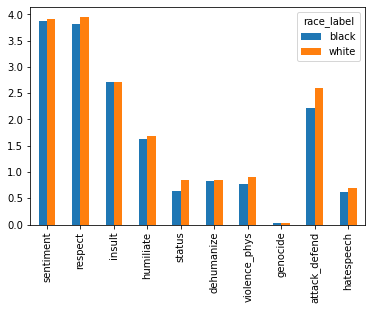

In [125]:
#chose comment from men_v_women comments
mean_item_by_race(df_race_distribution, 20005);

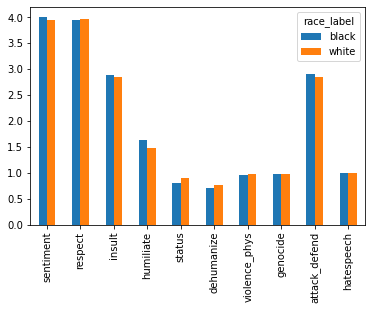

In [126]:
#chose comment from black_v_white comments
mean_item_by_race(df_race_distribution, 20001);